Registering fonts with R



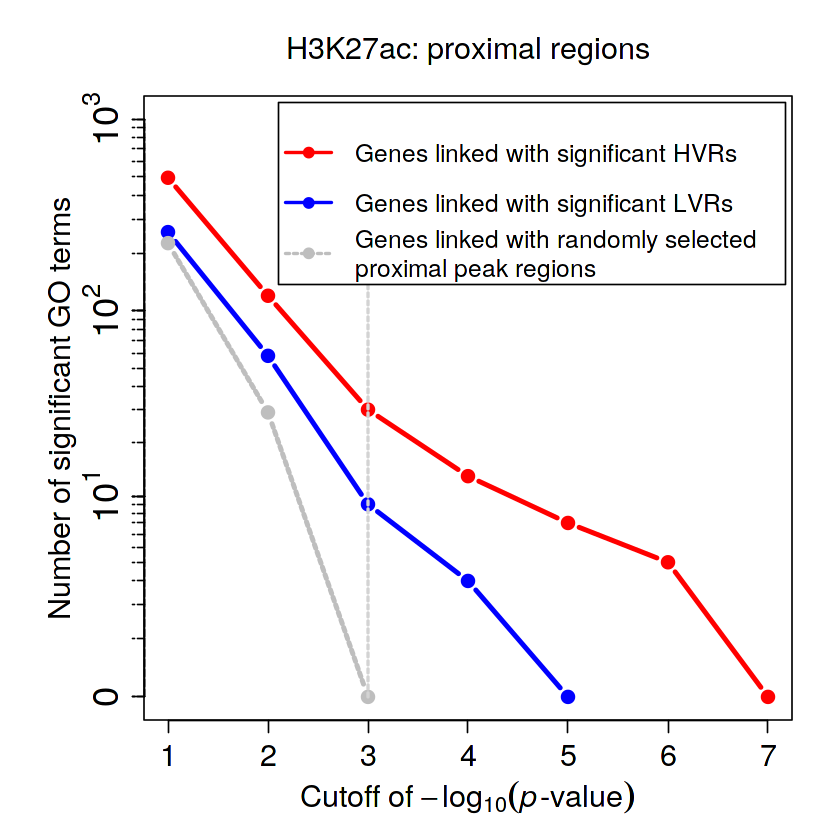

In [1]:
library(extrafont)

#---------------------------------------------------------
#Figure5A
#---------------------------------------------------------

par(mar=c(5,6,4,2),cex.main=1,font.main=1)
plot(c(1,2,3,4,5,6,7),
     c(2.69548168,2.08278537,1.49136169,1.14612804,0.90308999,0.69897,0),
     xlab=expression(paste("Cutoff of ", -log[10](paste(italic(p), "-value")))),
     ylab='Number of significant GO terms',
     cex.lab=1.5,cex.main=1.5,cex=1.5,,cex.axis=1.8,
     type='b',col='red',lwd=3,pch=c(16),ylim=c(0,3),xlim=c(1,7),     
     xaxt='n',yaxt='n',main='H3K27ac: proximal regions')


lines(c(1,2,3,4,5),
      c(2.41329976,1.77085201,1,0.60205999,0),
      type='b',col='blue',lwd=3,pch=c(16),cex=1.5,lty=1)

lines(c(1,2,3),
      c(2.35602586,1.47712125,0),
      type='b',col='grey',lwd=3,pch=c(16),cex=1.5,lty=2)

lines(c(3,3),c(0,2.2),col='lightgrey',lty=2,lwd=2)

legend('topright',legend=c('Genes linked with significant HVRs',
                           'Genes linked with significant LVRs',
                           'Genes linked with randomly selected \nproximal peak regions'),
       lty=c(1,1,2),lwd=2,
       inset=0.01,
       pch=16,
       col=c('red','blue','grey'),cex=1.2)




axis(side=1,at=c(1:7),labels=c(1:7),cex.axis=1.5)



axis(side=2,at=log10((c(0:10)+1)),labels=NA,cex.axis=1.8,lty=5)
axis(side=2,at=log10((c(1:10)*10+1)),labels=NA,cex.axis=1.8,lty=5)
axis(side=2,at=log10((c(1:10)*100)+1),labels=NA,cex.axis=1.8,lty=5)

axis(side=2,at=c(log10(0+1),log10(10+1),log10(100+1),log10(1000+1)),
                      labels=c(expression(0),
                               expression(10**1),
                               expression(10**2),
                               expression(10**3)),cex.axis=1.8)




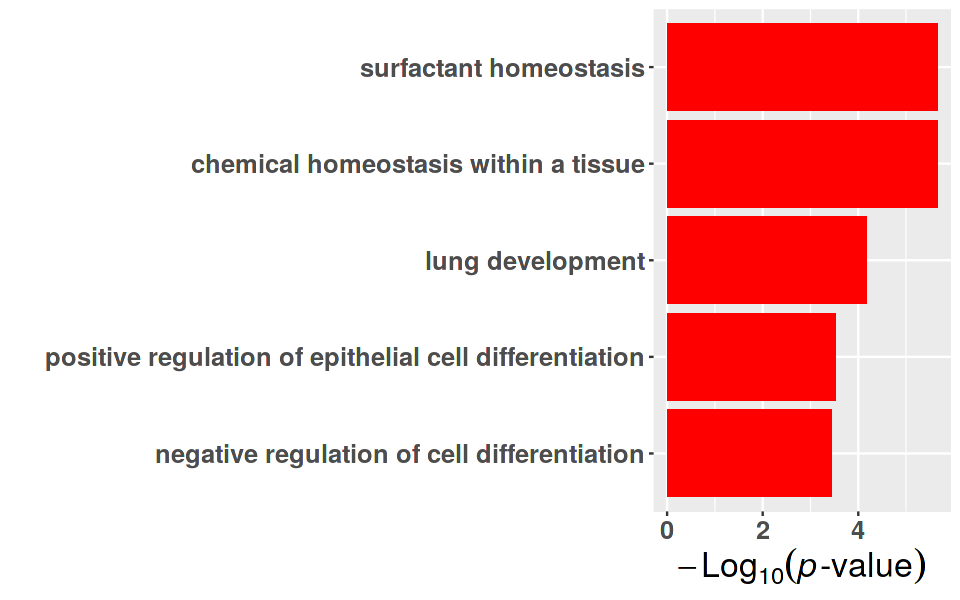

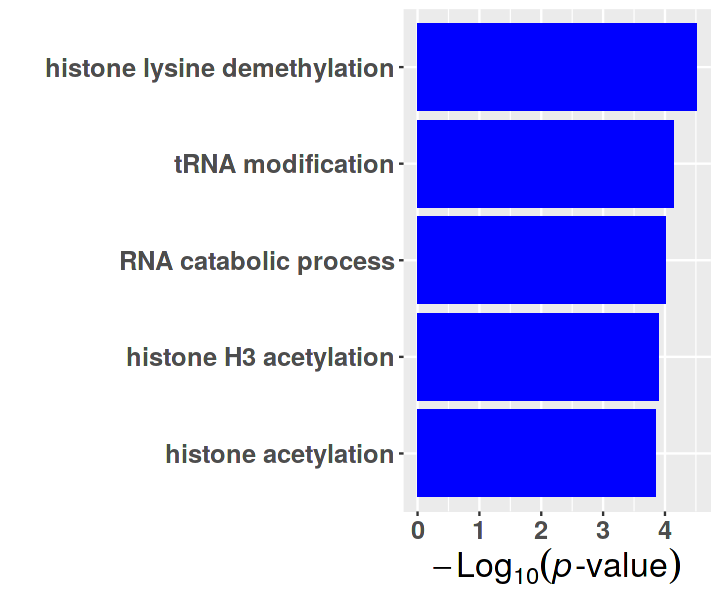

In [2]:
library(ggplot2)
library(forcats)
library(extrafont)


df1<-read.table('../LUAD_H3K27ac_ChIP_seq_data_set/Hypervariable_peaks_enriched_KEGG_pathways.txt',sep='\t',
               header=T)


df1$KEGG.pathway<-as.character(lapply(strsplit(as.character(df1$KEGG.pathway),' \\('),function(x){x[1]}))


df2<-read.table('../LUAD_H3K27ac_ChIP_seq_data_set/Hypovariable_peaks_enriched_KEGG_pathways.txt',sep='\t',
               header=T)

df2$KEGG.pathway<-as.character(lapply(strsplit(as.character(df2$KEGG.pathway),' \\('),function(x){x[1]}))


options(repr.plot.width=8,repr.plot.height=5)
ggplot(df1[c(5,6,13,18,20),],aes(x=fct_reorder(KEGG.pathway,p.value),y=p.value))+
geom_bar(stat="identity",fill='red')+
labs(x=" ",y=expression(-Log[10](paste(italic(p), "-value"))))+
coord_flip()+theme(title=element_text(size=12),axis.text=element_text(size=15,face="bold"),axis.title=element_text(size=20,face="bold")) 



options(repr.plot.width=6,repr.plot.height=5)
ggplot(df2[c(1,2,3,4,5),],aes(x=fct_reorder(KEGG.pathway,p.value),y=p.value))+
geom_bar(stat="identity",fill='blue')+
labs(x=" ",y=expression(-Log[10](paste(italic(p), "-value"))))+
coord_flip()+theme(title=element_text(size=12),axis.text=element_text(size=15,face="bold"),axis.title=element_text(size=20,face="bold")) 
